In [13]:
import mat73
import numpy as np
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import random
from PIL import Image

from torchvision import transforms
import torch
from itertools import permutations


In [4]:
file_path = "./data/nyu_depth_v2_labeled.mat"
data_dict = mat73.loadmat(file_path)

ERROR:root:ERROR: MATLAB type not supported: containers.Map, (uint32)


In [5]:
class Depthset(Dataset):
    def __init__(self,data_dict,transform=None):
        self.data_dict = data_dict
        self.size = self.data_dict['images'].shape[-1]
        self.transform = transform

    def __len__(self):
        return self.size

    def __getitem__(self,idx):
        image = self.data_dict["images"][:,:,:,idx]
        depth = self.data_dict["depths"][:,:,idx]
        sample = {"image":image,"depth":depth}

        if self.transform:
            sample = self.transform(sample)

        return sample

class Agument(object):
    def __init__(self):
        pass

    def __call__(self,sample):
        image,depth = sample['image'], sample['depth']
        
        alt_method = random.randint(0,2)

        image = {
            0:image,
            1:np.fliplr(image),
            2:np.flipud(image)
        }[alt_method]
        
        depth = {
            0:depth,
            1:np.fliplr(depth),
            2:np.flipud(depth)
        }[alt_method]

        sample = {"image":image,"depth":depth}

        return sample

class toTensor(object):
    def __init__(self,downscale=4):
        self.downscale = downscale

    def __call__(self, sample):
        image, depth = sample['image'], sample['depth']
        image = self.to_tensor(image)

        depth = depth[::self.downscale, ::self.downscale]
        depth = self.to_tensor(depth) * 1000

        depth = torch.clamp(depth,10,1000)
        sample = {'image': image, 'depth': depth}

        return sample

    def to_tensor(self,img):
        if img.ndim == 2:
            img = img[...,np.newaxis]

        img = torch.from_numpy(np.ascontiguousarray(img.transpose((2, 0, 1))))

        return img.float().div(255)

In [7]:
depth_dataset = Depthset(data_dict=data_dict,
                transform=transforms.Compose([Agument(),toTensor()]))
train_loader=DataLoader(depth_dataset, 10, shuffle=True)

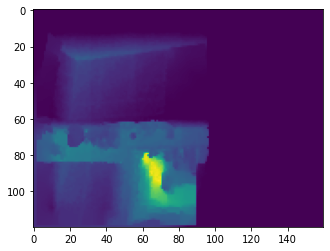

In [14]:
plt.imshow(batch['depth'][0,0])

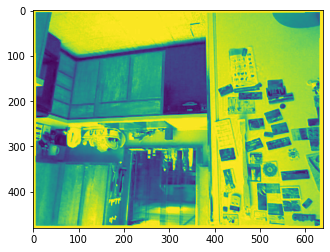

In [15]:
plt.imshow(batch['image'][0,0])

In [7]:
test_img = data_dict['images'][:,:,:,0]

In [22]:

indices = list(permutations(range(3), 3))
list(indices[random.randint(0, len(indices) - 1)])

[0, 2, 1]

In [23]:
data_dict['images'].shape

(480, 640, 3, 1449)